:::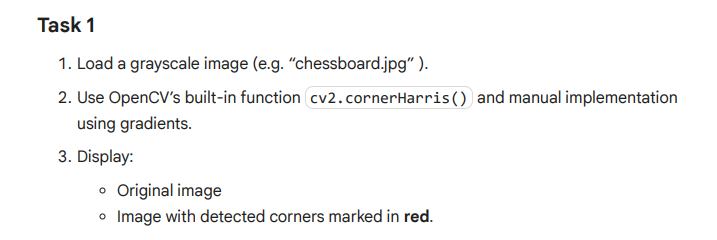

#Import Libraries

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Load a grayscale image

In [ ]:

gray = cv2.imread("bird.jpeg", cv2.IMREAD_GRAYSCALE)
gray_f = np.float32(gray)

#OpenCV’s built-in Harris corner detection

In [ ]:

dst_builtin = cv2.cornerHarris(gray_f, 2, 3, 0.04)
dst_builtin = cv2.dilate(dst_builtin, None)
img_builtin = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
img_builtin[dst_builtin > 0.01 * dst_builtin.max()] = [0, 0, 255]

#Manual implementation using gradients

In [ ]:

def manual_harris(gray_img, k=0.04, window=3):
    Ix = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
    Ixx, Iyy, Ixy = Ix**2, Iy**2, Ix*Iy
    Sxx = cv2.GaussianBlur(Ixx, (window, window), 1)
    Syy = cv2.GaussianBlur(Iyy, (window, window), 1)
    Sxy = cv2.GaussianBlur(Ixy, (window, window), 1)
    det = Sxx * Syy - Sxy**2
    trace = Sxx + Syy
    return det - k * (trace ** 2)

dst_manual = manual_harris(gray_f)
dst_manual = cv2.dilate(dst_manual, None)
img_manual = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
img_manual[dst_manual > 0.01 * dst_manual.max()] = [0, 0, 255]

#Display original and detected corners

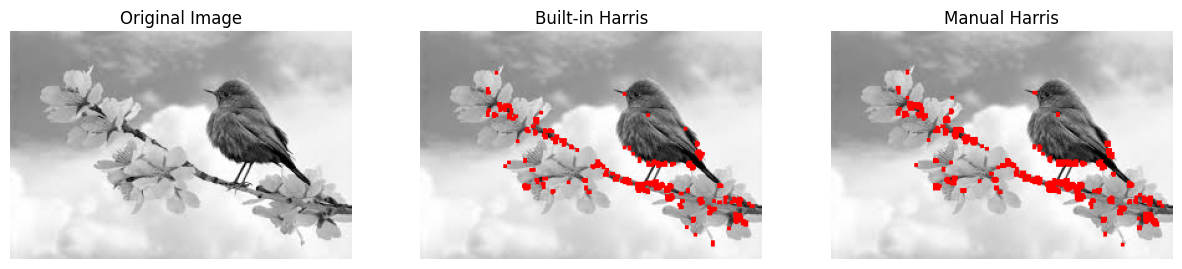

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img_builtin, cv2.COLOR_BGR2RGB))
plt.title("Built-in Harris")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img_manual, cv2.COLOR_BGR2RGB))
plt.title("Manual Harris")
plt.axis('off')

plt.show()


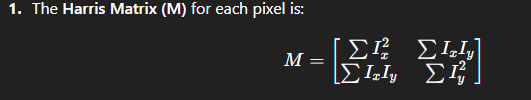

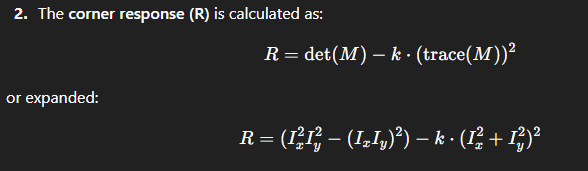

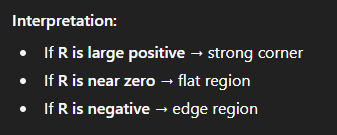

Task 1 — Harris Corner Detection

Brief Explanation:

1.The image is converted to grayscale to focus on intensity variations instead of color.

2.The Harris Corner Detector identifies points where pixel intensity changes sharply in both horizontal and vertical directions.

3.In the built-in method (cv2.cornerHarris), OpenCV automatically computes gradients and the corner response function.

4.In the manual method, Sobel filters are used to find gradients, and the Harris response
𝑅
=
det
⁡
(
𝑀
)
−
𝑘
(
trace
(
𝑀
)
)
2
R=det(M)−k(trace(M))
2
 determines corner strength.

5.High response (R) values indicate strong corners, which are marked in red for visualization.

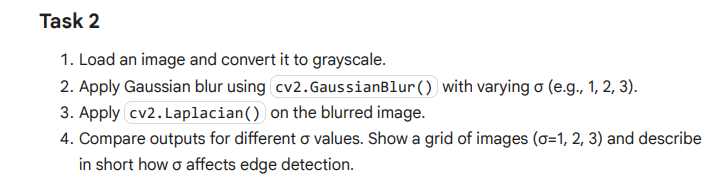

#Apply Gaussian blur with varying σ

In [ ]:

sigmas = [1, 2, 3]
blurred_imgs = [cv2.GaussianBlur(gray, (5, 5), s) for s in sigmas]



#Apply Laplacian on each blurred image

In [ ]:

laplacian_imgs = [cv2.convertScaleAbs(cv2.Laplacian(b, cv2.CV_64F)) for b in blurred_imgs]

#Display results for comparison

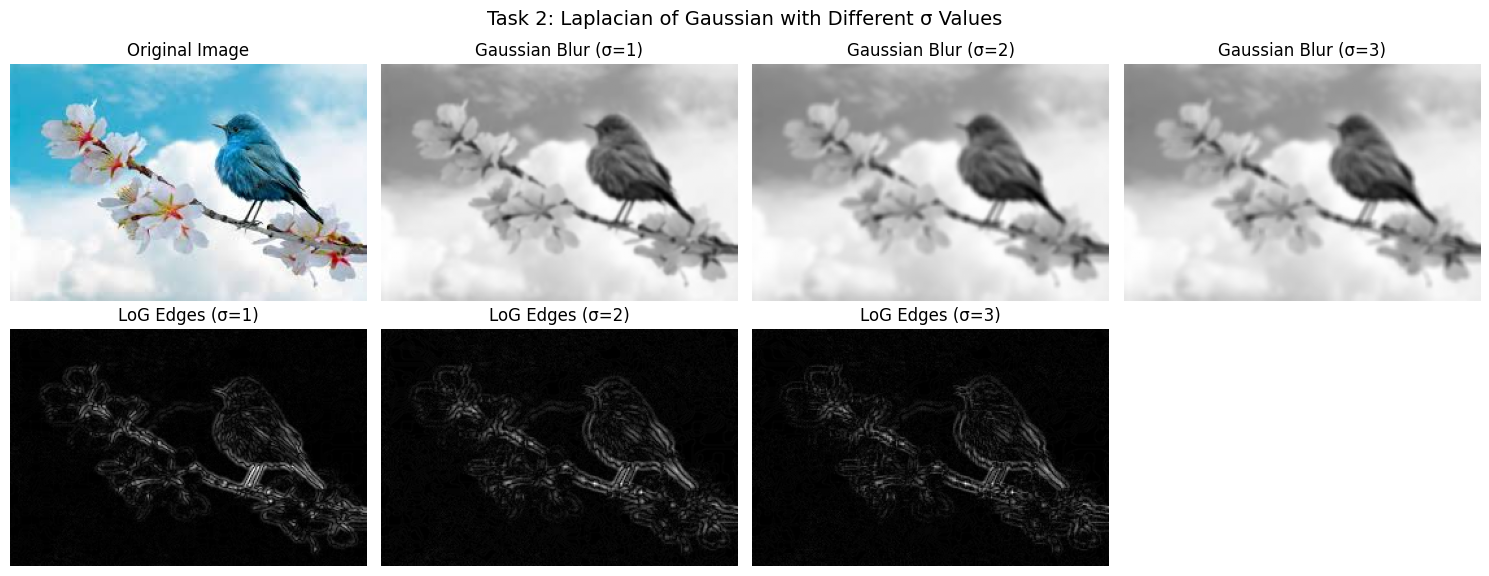

In [ ]:


plt.figure(figsize=(15, 6))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

for i, sigma in enumerate(sigmas):
    plt.subplot(2, 4, i + 2)
    plt.imshow(blurred_imgs[i], cmap='gray')
    plt.title(f'Gaussian Blur (σ={sigma})')
    plt.axis('off')

for i, sigma in enumerate(sigmas):
    plt.subplot(2, 4, i + 5)
    plt.imshow(laplacian_imgs[i], cmap='gray')
    plt.title(f'LoG Edges (σ={sigma})')
    plt.axis('off')

plt.suptitle("Task 2: Laplacian of Gaussian with Different σ Values", fontsize=14)
plt.tight_layout()
plt.show()


Task 2 — Laplacian of Gaussian (LoG)

Brief Explanation:

1.A smaller σ value keeps fine edges but introduces more noise.

2.A larger σ value smooths the image more, highlighting only the strongest and broader edges.

3.The Laplacian operator detects rapid intensity changes, marking these regions as edges.

Comparing outputs shows how σ directly affects edge clarity — balancing between fine detail detection and smooth edge representation.

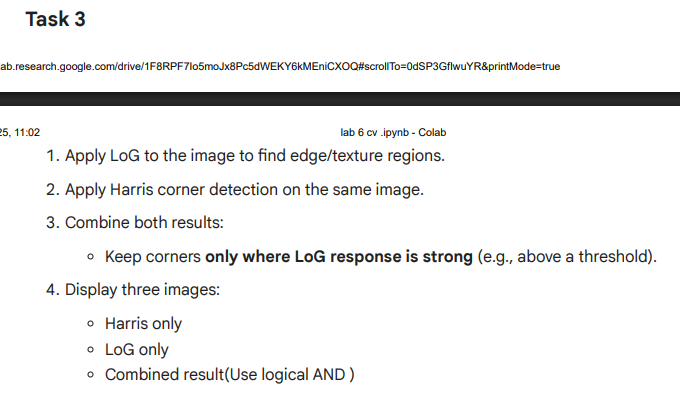

In [ ]:
img = cv2.imread("bird.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_f = np.float32(gray)

# Harris Corner Detection

In [ ]:

harris = cv2.cornerHarris(gray_f, 2, 3, 0.04)
harris = cv2.dilate(harris, None)

#Laplacian of Gaussian (LoG)

In [ ]:

blurred = cv2.GaussianBlur(gray, (5, 5), 1)
log = cv2.Laplacian(blurred, cv2.CV_64F)
log_abs = cv2.convertScaleAbs(log)


#Combine both (logical AND)

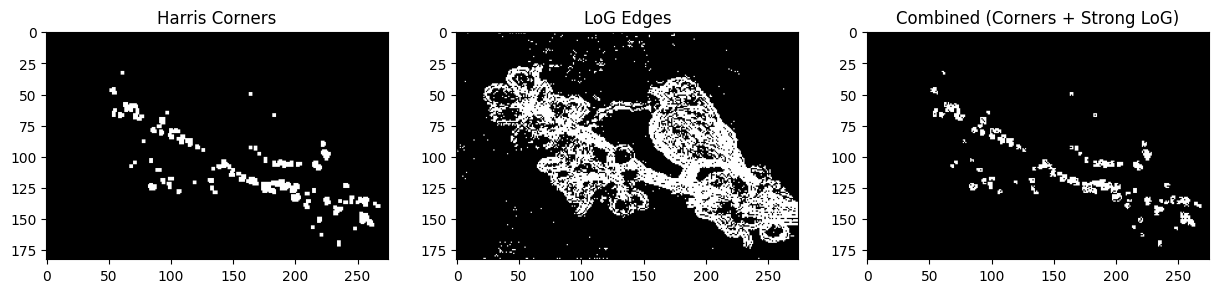

In [ ]:


harris_mask = harris > 0.01 * harris.max()
log_mask = log_abs > np.mean(log_abs)
combined_mask = np.logical_and(harris_mask, log_mask)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(harris_mask, cmap='gray')
plt.title("Harris Corners")

plt.subplot(1,3,2)
plt.imshow(log_mask, cmap='gray')
plt.title("LoG Edges")

plt.subplot(1,3,3)
plt.imshow(combined_mask, cmap='gray')
plt.title("Combined (Corners + Strong LoG)")

plt.show()


Task 3 — Harris Corner + Laplacian of Gaussian (LoG)

Brief Explanation:

1.The image is changed to grayscale to focus on light-intensity changes.

2.Harris Corner Detection finds corner points where intensity changes in two directions.

3.LoG (Laplacian of Gaussian) finds strong edges and texture areas in the image.

4.Both results are combined so that only corners lying on strong edges are kept.

This gives more accurate and reliable corner points while removing weak or noisy ones.